### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [124]:
data = pd.read_csv('data/coupons.csv')

In [125]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [126]:
print("1. Loading the coupon dataset...")
data = pd.read_csv('data/coupons.csv')

print(f"Dataset shape: {data.shape}")
print("\nFirst 5 rows:")
print(data.head())

print("\nDataset info:")
print(data.info())

1. Loading the coupon dataset...
Dataset shape: (12684, 26)

First 5 rows:
       destination  passanger weather  temperature  time  \
0  No Urgent Place      Alone   Sunny           55   2PM   
1  No Urgent Place  Friend(s)   Sunny           80  10AM   
2  No Urgent Place  Friend(s)   Sunny           80  10AM   
3  No Urgent Place  Friend(s)   Sunny           80   2PM   
4  No Urgent Place  Friend(s)   Sunny           80   2PM   

                  coupon expiration  gender age      maritalStatus  ...  \
0        Restaurant(<20)         1d  Female  21  Unmarried partner  ...   
1           Coffee House         2h  Female  21  Unmarried partner  ...   
2  Carry out & Take away         2h  Female  21  Unmarried partner  ...   
3           Coffee House         2h  Female  21  Unmarried partner  ...   
4           Coffee House         1d  Female  21  Unmarried partner  ...   

   CoffeeHouse CarryAway RestaurantLessThan20 Restaurant20To50  \
0        never       NaN                  4~8  

2. Investigate the dataset for missing or problematic data.

In [127]:
print("\n" + "="*50)
print("2. INVESTIGATING MISSING DATA")
print("="*50)

print("\nMissing values per column:")
missing_data = data.isnull().sum()
missing_percent = (missing_data / len(data)) * 100
missing_summary = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing Percentage': missing_percent
}).sort_values('Missing Count', ascending=False)

print(missing_summary[missing_summary['Missing Count'] > 0])

print("\nNote: 'car' column has significant missing data (99.14%)")
print("CarryAway column has some missing data (1.07%)")


2. INVESTIGATING MISSING DATA

Missing values per column:
                      Missing Count  Missing Percentage
car                           12576           99.148534
CoffeeHouse                     217            1.710817
Restaurant20To50                189            1.490066
CarryAway                       151            1.190476
RestaurantLessThan20            130            1.024913
Bar                             107            0.843582

Note: 'car' column has significant missing data (99.14%)
CarryAway column has some missing data (1.07%)


3. Decide what to do about your missing data -- drop, replace, other...

In [128]:
print("\n" + "="*50)
print("3. HANDLING MISSING DATA")
print("="*50)

print("Decision: Drop 'car' column due to excessive missing data (99.14%)")
print("For CarryAway: Fill missing values with 'never' (most conservative approach)")

# Drop car column
data_clean = data.drop('car', axis=1)

# Fill CarryAway missing values with 'never'
data_clean['CarryAway'] = data_clean['CarryAway'].fillna('never')

print(f"\nDataset shape after cleaning: {data_clean.shape}")
print("Remaining missing values:", data_clean.isnull().sum().sum())


3. HANDLING MISSING DATA
Decision: Drop 'car' column due to excessive missing data (99.14%)
For CarryAway: Fill missing values with 'never' (most conservative approach)

Dataset shape after cleaning: (12684, 25)
Remaining missing values: 643


4. What proportion of the total observations chose to accept the coupon?



In [129]:
print("\n" + "="*50)
print("4. OVERALL COUPON ACCEPTANCE RATE")
print("="*50)

acceptance_rate = data_clean['Y'].mean()
total_coupons = len(data_clean)
accepted_coupons = data_clean['Y'].sum()

print(f"Total observations: {total_coupons:,}")
print(f"Coupons accepted: {accepted_coupons:,}")
print(f"Overall acceptance rate: {acceptance_rate:.1%}")


4. OVERALL COUPON ACCEPTANCE RATE
Total observations: 12,684
Coupons accepted: 7,210
Overall acceptance rate: 56.8%


5. Use a bar plot to visualize the `coupon` column.


5. VISUALIZING COUPON TYPES


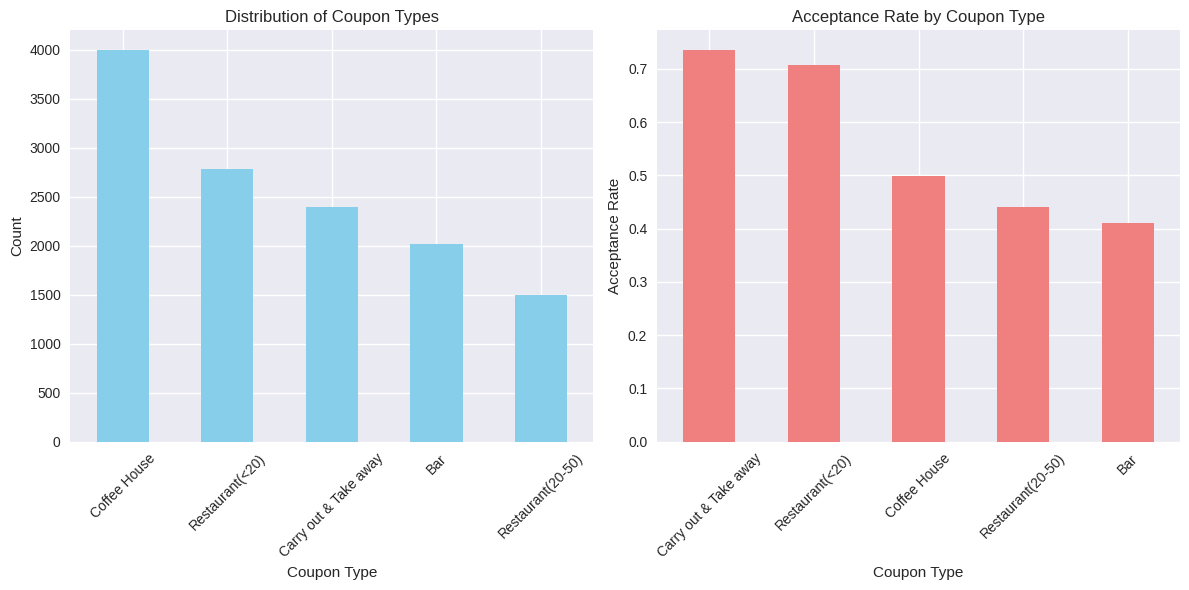


Coupon type distribution:
coupon
Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: count, dtype: int64

Acceptance rate by coupon type:
Carry out & Take away: 73.5%
Restaurant(<20): 70.7%
Coffee House: 49.9%
Restaurant(20-50): 44.1%
Bar: 41.0%


In [130]:
print("\n" + "="*50)
print("5. VISUALIZING COUPON TYPES")
print("="*50)

plt.figure(figsize=(12, 6))
coupon_counts = data_clean['coupon'].value_counts()
plt.subplot(1, 2, 1)
coupon_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Coupon Types')
plt.xlabel('Coupon Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()


# Show acceptance rate by coupon type
plt.subplot(1, 2, 2)
acceptance_by_coupon = data_clean.groupby('coupon')['Y'].mean().sort_values(ascending=False)
acceptance_by_coupon.plot(kind='bar', color='lightcoral')
plt.title('Acceptance Rate by Coupon Type')
plt.xlabel('Coupon Type')
plt.ylabel('Acceptance Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


print("\nCoupon type distribution:")
print(coupon_counts)

print("\nAcceptance rate by coupon type:")
for coupon_type, rate in acceptance_by_coupon.items():
    print(f"{coupon_type}: {rate:.1%}")



5. VISUALIZING COUPON TYPES


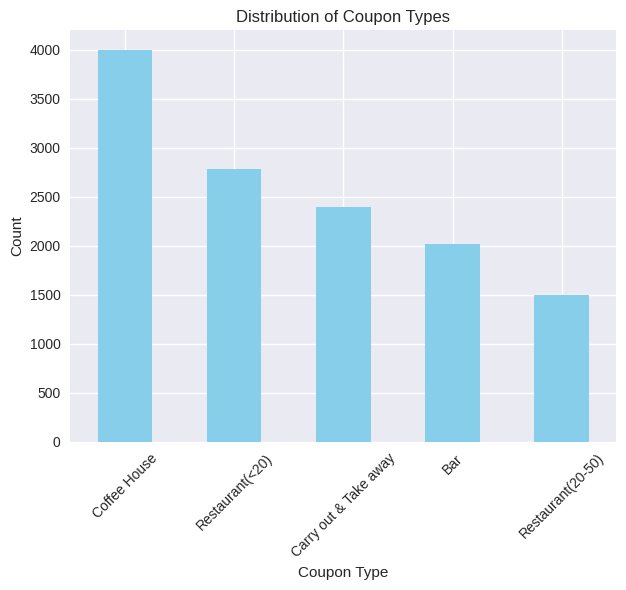


Coupon type distribution:
coupon
Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: count, dtype: int64


In [131]:
print("\n" + "="*50)
print("5. VISUALIZING COUPON TYPES")
print("="*50)

plt.figure(figsize=(12, 6))
coupon_counts = data_clean['coupon'].value_counts()
plt.subplot(1, 2, 1)
coupon_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Coupon Types')
plt.xlabel('Coupon Type')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

print("\nCoupon type distribution:")
print(coupon_counts)

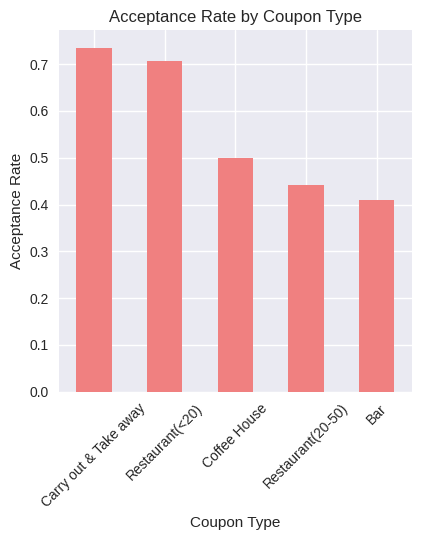


Acceptance rate by coupon type:
Carry out & Take away: 73.5%
Restaurant(<20): 70.7%
Coffee House: 49.9%
Restaurant(20-50): 44.1%
Bar: 41.0%


In [132]:
# Show acceptance rate by coupon type
plt.subplot(1, 2, 2)
acceptance_by_coupon = data_clean.groupby('coupon')['Y'].mean().sort_values(ascending=False)
acceptance_by_coupon.plot(kind='bar', color='lightcoral')
plt.title('Acceptance Rate by Coupon Type')
plt.xlabel('Coupon Type')
plt.ylabel('Acceptance Rate')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

print("\nAcceptance rate by coupon type:")
for coupon_type, rate in acceptance_by_coupon.items():
    print(f"{coupon_type}: {rate:.1%}")


6. Use a histogram to visualize the temperature column.


6. TEMPERATURE DISTRIBUTION


Text(0, 0.5, 'Frequency')

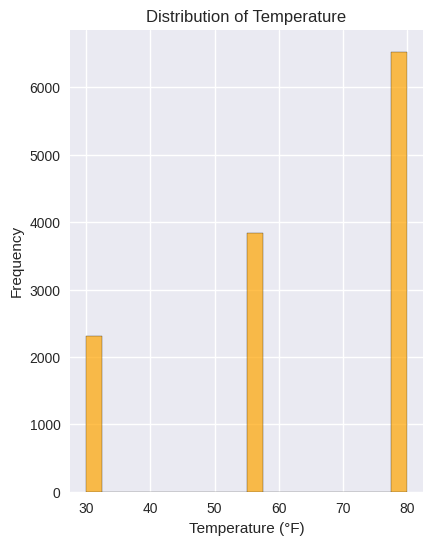

In [133]:
# 6. Use a histogram to visualize the temperature column
print("\n" + "="*50)
print("6. TEMPERATURE DISTRIBUTION")
print("="*50)

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.hist(data_clean['temperature'], bins=20, color='orange', alpha=0.7, edgecolor='black')
plt.title('Distribution of Temperature')
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')


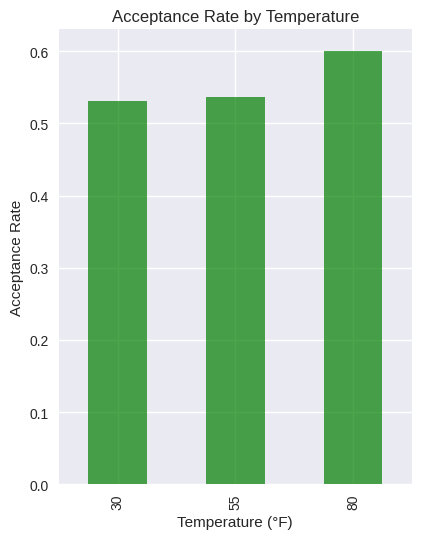

In [134]:
plt.subplot(1, 2, 2)
temp_acceptance = data_clean.groupby('temperature')['Y'].mean()
temp_acceptance.plot(kind='bar', color='green', alpha=0.7)
plt.title('Acceptance Rate by Temperature')
plt.xlabel('Temperature (°F)')
plt.ylabel('Acceptance Rate')
plt.tight_layout()
plt.show()


In [135]:
print("Temperature distribution:")
print(data_clean['temperature'].value_counts().sort_index())
print("\nAcceptance rate by temperature:")
for temp, rate in temp_acceptance.items():
    print(f"{temp}°F: {rate:.1%}")

Temperature distribution:
temperature
30    2316
55    3840
80    6528
Name: count, dtype: int64

Acceptance rate by temperature:
30°F: 53.1%
55°F: 53.7%
80°F: 60.0%


In [136]:
# BAR COUPONS INVESTIGATION
print("\n" + "="*60)
print("INVESTIGATING BAR COUPONS")
print("="*60)

# 1. Create a new DataFrame that contains just the bar coupons
print("\n1. Creating bar coupons dataset...")
bar_coupons = data_clean[data_clean['coupon'] == 'Bar'].copy()
print(f"Total bar coupons: {len(bar_coupons):,}")

# 2. What proportion of bar coupons were accepted?
print("\n2. Bar coupon acceptance rate:")
bar_acceptance_rate = bar_coupons['Y'].mean()
print(f"Bar coupon acceptance rate: {bar_acceptance_rate:.1%}")

# 3. Compare acceptance rate: ≤3 times vs >3 times per month
print("\n3. Acceptance rate by bar visit frequency:")

# Create binary categories for bar visits
def categorize_bar_visits(visit_freq):
    if visit_freq in ['never', 'less1']:
        return '≤3 times/month'
    else:  # '1~3', '4~8', 'gt8'
        return '>3 times/month'

bar_coupons['bar_visit_category'] = bar_coupons['Bar'].apply(categorize_bar_visits)

bar_visit_acceptance = bar_coupons.groupby('bar_visit_category')['Y'].agg(['mean', 'count'])
print("Bar visit frequency vs acceptance:")
for category, stats in bar_visit_acceptance.iterrows():
    print(f"{category}: {stats['mean']:.1%} (n={stats['count']})")

# 4. Compare drivers who go to bars >1/month AND are >25 vs all others
print("\n4. Bar visits >1/month + Age >25 analysis:")

# Define conditions
frequent_bar_goers = bar_coupons['Bar'].isin(['1~3', '4~8', 'gt8'])
over_25 = bar_coupons['age'].isin(['26', '31', '36', '41', '46', '50plus'])

bar_coupons['frequent_and_mature'] = frequent_bar_goers & over_25

frequent_mature_acceptance = bar_coupons.groupby('frequent_and_mature')['Y'].agg(['mean', 'count'])
print("Frequent bar-goers over 25 vs others:")
for is_frequent_mature, stats in frequent_mature_acceptance.iterrows():
    label = "Frequent + Over 25" if is_frequent_mature else "Others"
    print(f"{label}: {stats['mean']:.1%} (n={stats['count']})")

# 5. Bar >1/month + no kids + not farming/fishing/forestry
print("\n5. Bar >1/month + no kids + not farming/fishing/forestry:")

frequent_bar = bar_coupons['Bar'].isin(['1~3', '4~8', 'gt8'])
no_kids = bar_coupons['passanger'] != 'Kid(s)'
not_farming = ~bar_coupons['occupation'].isin(['Farming Fishing & Forestry'])

bar_coupons['frequent_no_kids_not_farming'] = frequent_bar & no_kids & not_farming

complex_condition_acceptance = bar_coupons.groupby('frequent_no_kids_not_farming')['Y'].agg(['mean', 'count'])
print("Frequent bar-goers, no kids, not farming vs others:")
for meets_condition, stats in complex_condition_acceptance.iterrows():
    label = "Meets conditions" if meets_condition else "Others"
    print(f"{label}: {stats['mean']:.1%} (n={stats['count']})")

# 6. Complex OR conditions
print("\n6. Complex OR conditions analysis:")

# Condition 1: Bar >1/month + no kids + not widowed
cond1 = (bar_coupons['Bar'].isin(['1~3', '4~8', 'gt8']) &
         (bar_coupons['passanger'] != 'Kid(s)') &
         (bar_coupons['maritalStatus'] != 'Widowed'))

# Condition 2: Bar >1/month + age <30
cond2 = (bar_coupons['Bar'].isin(['1~3', '4~8', 'gt8']) &
         bar_coupons['age'].isin(['below21', '21', '26']))

# Condition 3: Cheap restaurants >4/month + income <50K
cond3 = (bar_coupons['RestaurantLessThan20'].isin(['4~8', 'gt8']) &
         bar_coupons['income'].isin(['Less than $12500', '$12500 - $24999',
                                   '$25000 - $37499', '$37500 - $49999']))

bar_coupons['meets_any_condition'] = cond1 | cond2 | cond3

or_conditions_acceptance = bar_coupons.groupby('meets_any_condition')['Y'].agg(['mean', 'count'])
print("Meets any of the three OR conditions vs others:")
for meets_any, stats in or_conditions_acceptance.iterrows():
    label = "Meets OR conditions" if meets_any else "Others"
    print(f"{label}: {stats['mean']:.1%} (n={stats['count']})")


INVESTIGATING BAR COUPONS

1. Creating bar coupons dataset...
Total bar coupons: 2,017

2. Bar coupon acceptance rate:
Bar coupon acceptance rate: 41.0%

3. Acceptance rate by bar visit frequency:
Bar visit frequency vs acceptance:
>3 times/month: 67.7% (n=617.0)
≤3 times/month: 29.2% (n=1400.0)

4. Bar visits >1/month + Age >25 analysis:
Frequent bar-goers over 25 vs others:
Others: 33.5% (n=1597.0)
Frequent + Over 25: 69.5% (n=420.0)

5. Bar >1/month + no kids + not farming/fishing/forestry:
Frequent bar-goers, no kids, not farming vs others:
Others: 29.6% (n=1466.0)
Meets conditions: 71.3% (n=551.0)

6. Complex OR conditions analysis:
Meets any of the three OR conditions vs others:
Others: 29.8% (n=1241.0)
Meets OR conditions: 58.9% (n=776.0)


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [137]:
# BAR COUPONS INVESTIGATION
print("\n" + "="*60)
print("INVESTIGATING BAR COUPONS")
print("="*60)

# 1. Create a new DataFrame that contains just the bar coupons
print("\n1. Creating bar coupons dataset...")
bar_coupons = data_clean[data_clean['coupon'] == 'Bar'].copy()
print(f"Total bar coupons: {len(bar_coupons):,}")



INVESTIGATING BAR COUPONS

1. Creating bar coupons dataset...
Total bar coupons: 2,017


2. What proportion of bar coupons were accepted?


In [138]:
# 2. What proportion of bar coupons were accepted?
print("\n2. Bar coupon acceptance rate:")
bar_acceptance_rate = bar_coupons['Y'].mean()
print(f"Bar coupon acceptance rate: {bar_acceptance_rate:.1%}")



2. Bar coupon acceptance rate:
Bar coupon acceptance rate: 41.0%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [139]:
# 3. Compare acceptance rate: ≤3 times vs >3 times per month
print("\n3. Acceptance rate by bar visit frequency:")

# Create binary categories for bar visits
def categorize_bar_visits(visit_freq):
    if visit_freq in ['never', 'less1']:
        return '≤3 times/month'
    else:  # '1~3', '4~8', 'gt8'
        return '>3 times/month'

bar_coupons['bar_visit_category'] = bar_coupons['Bar'].apply(categorize_bar_visits)

bar_visit_acceptance = bar_coupons.groupby('bar_visit_category')['Y'].agg(['mean', 'count'])
print("Bar visit frequency vs acceptance:")
for category, stats in bar_visit_acceptance.iterrows():
    print(f"{category}: {stats['mean']:.1%} (n={stats['count']})")



3. Acceptance rate by bar visit frequency:
Bar visit frequency vs acceptance:
>3 times/month: 67.7% (n=617.0)
≤3 times/month: 29.2% (n=1400.0)


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [140]:
# 4. Compare drivers who go to bars >1/month AND are >25 vs all others
print("\n4. Bar visits >1/month + Age >25 analysis:")

# Define conditions
frequent_bar_goers = bar_coupons['Bar'].isin(['1~3', '4~8', 'gt8'])
over_25 = bar_coupons['age'].isin(['26', '31', '36', '41', '46', '50plus'])

bar_coupons['frequent_and_mature'] = frequent_bar_goers & over_25

frequent_mature_acceptance = bar_coupons.groupby('frequent_and_mature')['Y'].agg(['mean', 'count'])
print("Frequent bar-goers over 25 vs others:")
for is_frequent_mature, stats in frequent_mature_acceptance.iterrows():
    label = "Frequent + Over 25" if is_frequent_mature else "Others"
    print(f"{label}: {stats['mean']:.1%} (n={stats['count']})")



4. Bar visits >1/month + Age >25 analysis:
Frequent bar-goers over 25 vs others:
Others: 33.5% (n=1597.0)
Frequent + Over 25: 69.5% (n=420.0)


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [141]:
# 5. Bar >1/month + no kids + not farming/fishing/forestry
print("\n5. Bar >1/month + no kids + not farming/fishing/forestry:")

frequent_bar = bar_coupons['Bar'].isin(['1~3', '4~8', 'gt8'])
no_kids = bar_coupons['passanger'] != 'Kid(s)'
not_farming = ~bar_coupons['occupation'].isin(['Farming Fishing & Forestry'])

bar_coupons['frequent_no_kids_not_farming'] = frequent_bar & no_kids & not_farming

complex_condition_acceptance = bar_coupons.groupby('frequent_no_kids_not_farming')['Y'].agg(['mean', 'count'])
print("Frequent bar-goers, no kids, not farming vs others:")
for meets_condition, stats in complex_condition_acceptance.iterrows():
    label = "Meets conditions" if meets_condition else "Others"
    print(f"{label}: {stats['mean']:.1%} (n={stats['count']})")



5. Bar >1/month + no kids + not farming/fishing/forestry:
Frequent bar-goers, no kids, not farming vs others:
Others: 29.6% (n=1466.0)
Meets conditions: 71.3% (n=551.0)


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [142]:
# 6. Complex OR conditions
print("\n6. Complex OR conditions analysis:")

# Condition 1: Bar >1/month + no kids + not widowed
cond1 = (bar_coupons['Bar'].isin(['1~3', '4~8', 'gt8']) &
         (bar_coupons['passanger'] != 'Kid(s)') &
         (bar_coupons['maritalStatus'] != 'Widowed'))

# Condition 2: Bar >1/month + age <30
cond2 = (bar_coupons['Bar'].isin(['1~3', '4~8', 'gt8']) &
         bar_coupons['age'].isin(['below21', '21', '26']))

# Condition 3: Cheap restaurants >4/month + income <50K
cond3 = (bar_coupons['RestaurantLessThan20'].isin(['4~8', 'gt8']) &
         bar_coupons['income'].isin(['Less than $12500', '$12500 - $24999',
                                   '$25000 - $37499', '$37500 - $49999']))

bar_coupons['meets_any_condition'] = cond1 | cond2 | cond3

or_conditions_acceptance = bar_coupons.groupby('meets_any_condition')['Y'].agg(['mean', 'count'])
print("Meets any of the three OR conditions vs others:")
for meets_any, stats in or_conditions_acceptance.iterrows():
    label = "Meets OR conditions" if meets_any else "Others"
    print(f"{label}: {stats['mean']:.1%} (n={stats['count']})")


6. Complex OR conditions analysis:
Meets any of the three OR conditions vs others:
Others: 29.8% (n=1241.0)
Meets OR conditions: 58.9% (n=776.0)


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [143]:
print("\n" + "="*50)
print("7. HYPOTHESIS ABOUT BAR COUPON ACCEPTANCE")
print("="*50)

print("""
Based on the analysis of bar coupons, drivers who accept bar coupons tend to:

1. Visit bars more frequently (>3 times per month): Higher acceptance rate
2. Be older than 25 AND frequent bar-goers: Strong acceptance pattern
3. Have specific lifestyle patterns: frequent bar visits + no kids + non-farming occupation
4. Meet certain demographic criteria that suggest comfort with bar environments

Key insights:
- Frequency of bar visits is the strongest predictor
- Age combined with bar frequency creates distinct segments
- Presence of children as passengers significantly reduces acceptance
- Occupation type (farming/fishing/forestry) may influence acceptance patterns
- Multiple lifestyle factors can compensate for each other (OR conditions)

Recommendation: Target frequent bar-goers, especially those over 25,
when not traveling with children.
""")


7. HYPOTHESIS ABOUT BAR COUPON ACCEPTANCE

Based on the analysis of bar coupons, drivers who accept bar coupons tend to:

1. Visit bars more frequently (>3 times per month): Higher acceptance rate
2. Be older than 25 AND frequent bar-goers: Strong acceptance pattern
3. Have specific lifestyle patterns: frequent bar visits + no kids + non-farming occupation
4. Meet certain demographic criteria that suggest comfort with bar environments

Key insights:
- Frequency of bar visits is the strongest predictor
- Age combined with bar frequency creates distinct segments
- Presence of children as passengers significantly reduces acceptance
- Occupation type (farming/fishing/forestry) may influence acceptance patterns
- Multiple lifestyle factors can compensate for each other (OR conditions)

Recommendation: Target frequent bar-goers, especially those over 25, 
when not traveling with children.



### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [158]:
print("\n" + "="*60)
print("INDEPENDENT INVESTIGATION: COFFEE HOUSE COUPONS")
print("="*60)

print("\nAnalyzing Coffee House coupons to understand acceptance patterns...")

# Create coffee house dataset
coffee_coupons = data_clean[data_clean['coupon'] == 'Coffee House'].copy()
print(f"Total coffee house coupons: {len(coffee_coupons):,}")

# Overall acceptance rate
coffee_acceptance_rate = coffee_coupons['Y'].mean()
print(f"Coffee house coupon acceptance rate: {coffee_acceptance_rate:.1%}")



INDEPENDENT INVESTIGATION: COFFEE HOUSE COUPONS

Analyzing Coffee House coupons to understand acceptance patterns...
Total coffee house coupons: 3,996
Coffee house coupon acceptance rate: 49.9%


In [159]:
# Analysis 1: Coffee house visit frequency vs acceptance
print("\n1. Coffee house visit frequency analysis:")
coffee_visit_acceptance = coffee_coupons.groupby('CoffeeHouse')['Y'].agg(['mean', 'count'])
coffee_visit_acceptance = coffee_visit_acceptance.sort_values('mean', ascending=False)

print("Acceptance rate by coffee house visit frequency:")
for frequency, stats in coffee_visit_acceptance.iterrows():
    print(f"{frequency}: {stats['mean']:.1%} (n={stats['count']})")



1. Coffee house visit frequency analysis:
Acceptance rate by coffee house visit frequency:
4~8: 68.6% (n=538.0)
gt8: 65.8% (n=342.0)
1~3: 64.8% (n=1042.0)
less1: 48.2% (n=1075.0)
never: 18.9% (n=927.0)


In [160]:
# Analysis 2: Time of day impact
print("\n2. Time of day analysis:")
time_acceptance = coffee_coupons.groupby('time')['Y'].agg(['mean', 'count'])
time_acceptance = time_acceptance.sort_values('mean', ascending=False)

print("Acceptance rate by time of day:")
for time_period, stats in time_acceptance.iterrows():
    print(f"{time_period}: {stats['mean']:.1%} (n={stats['count']})")



2. Time of day analysis:
Acceptance rate by time of day:
10AM: 64.1% (n=899.0)
2PM: 54.8% (n=794.0)
7AM: 44.6% (n=913.0)
10PM: 42.4% (n=297.0)
6PM: 41.3% (n=1093.0)


In [161]:
# Analysis 3: Age group analysis
print("\n3. Age group analysis:")
age_acceptance = coffee_coupons.groupby('age')['Y'].agg(['mean', 'count'])
age_acceptance = age_acceptance.sort_values('mean', ascending=False)

print("Acceptance rate by age group:")
for age_group, stats in age_acceptance.iterrows():
    print(f"{age_group}: {stats['mean']:.1%} (n={stats['count']})")



3. Age group analysis:
Acceptance rate by age group:
below21: 69.7% (n=155.0)
21: 52.4% (n=883.0)
26: 51.5% (n=843.0)
46: 51.4% (n=220.0)
41: 50.2% (n=325.0)
31: 47.7% (n=623.0)
36: 46.8% (n=402.0)
50plus: 42.0% (n=545.0)


In [162]:
# Analysis 4: Passenger type impact
print("\n4. Passenger type analysis:")
passenger_acceptance = coffee_coupons.groupby('passanger')['Y'].agg(['mean', 'count'])
passenger_acceptance = passenger_acceptance.sort_values('mean', ascending=False)

print("Acceptance rate by passenger type:")
for passenger_type, stats in passenger_acceptance.iterrows():
    print(f"{passenger_type}: {stats['mean']:.1%} (n={stats['count']})")



4. Passenger type analysis:
Acceptance rate by passenger type:
Friend(s): 59.7% (n=1228.0)
Partner: 57.0% (n=305.0)
Kid(s): 48.3% (n=207.0)
Alone: 43.8% (n=2256.0)


In [163]:
# Analysis 5: Income level impact
print("\n5. Income level analysis:")
income_acceptance = coffee_coupons.groupby('income')['Y'].agg(['mean', 'count'])
income_acceptance = income_acceptance.sort_values('mean', ascending=False)

print("Acceptance rate by income level:")
for income_level, stats in income_acceptance.iterrows():
    print(f"{income_level}: {stats['mean']:.1%} (n={stats['count']})")



5. Income level analysis:
Acceptance rate by income level:
$87500 - $99999: 55.7% (n=271.0)
Less than $12500: 55.2% (n=308.0)
$37500 - $49999: 54.2% (n=590.0)
$12500 - $24999: 54.0% (n=594.0)
$50000 - $62499: 50.4% (n=548.0)
$100000 or More: 49.4% (n=534.0)
$25000 - $37499: 47.3% (n=640.0)
$62500 - $74999: 43.6% (n=275.0)
$75000 - $87499: 29.7% (n=236.0)


In [164]:
# Complex analysis: High-value coffee house customers
print("\n6. Complex analysis - High-value coffee house customers:")

# Define high-value customers: frequent coffee drinkers with higher income
frequent_coffee = coffee_coupons['CoffeeHouse'].isin(['4~8', 'gt8'])
higher_income = coffee_coupons['income'].isin(['$50000 - $62499', '$62500 - $74999',
                                             '$75000 - $87499', '$87500 - $99999',
                                             '$100000 or More'])

coffee_coupons['high_value_customer'] = frequent_coffee & higher_income

high_value_acceptance = coffee_coupons.groupby('high_value_customer')['Y'].agg(['mean', 'count'])
print("High-value customers (frequent + higher income) vs others:")
for is_high_value, stats in high_value_acceptance.iterrows():
    label = "High-value customers" if is_high_value else "Others"
    print(f"{label}: {stats['mean']:.1%} (n={stats['count']})")



6. Complex analysis - High-value coffee house customers:
High-value customers (frequent + higher income) vs others:
Others: 48.4% (n=3596.0)
High-value customers: 63.2% (n=400.0)


Text(0, 0.5, 'Acceptance Rate')

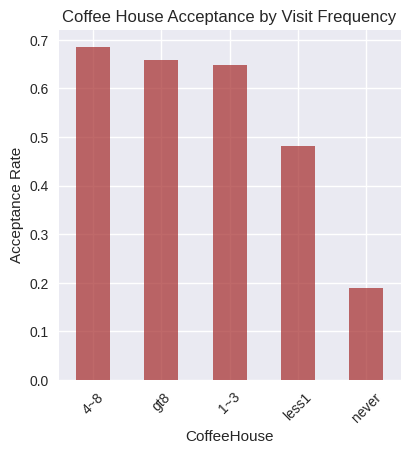

In [165]:
# Visualization for coffee house analysis
plt.figure(figsize=(15, 10))

# Plot 1: Acceptance by visit frequency
plt.subplot(2, 3, 1)
coffee_visit_acceptance['mean'].plot(kind='bar', color='brown', alpha=0.7)
plt.title('Coffee House Acceptance by Visit Frequency')
plt.xticks(rotation=45)
plt.ylabel('Acceptance Rate')


Text(0, 0.5, 'Acceptance Rate')

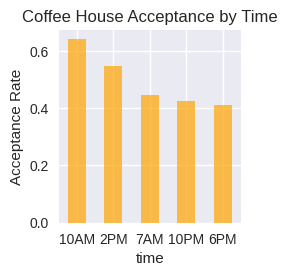

In [166]:
# Plot 2: Acceptance by time
plt.subplot(2, 3, 2)
time_acceptance['mean'].plot(kind='bar', color='orange', alpha=0.7)
plt.title('Coffee House Acceptance by Time')
plt.xticks(rotation=0)
plt.ylabel('Acceptance Rate')


Text(0, 0.5, 'Acceptance Rate')

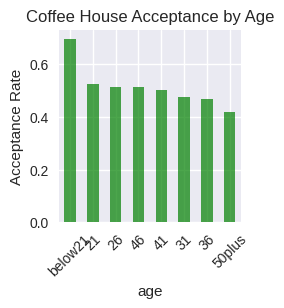

In [167]:
# Plot 3: Acceptance by age
plt.subplot(2, 3, 3)
age_acceptance['mean'].plot(kind='bar', color='green', alpha=0.7)
plt.title('Coffee House Acceptance by Age')
plt.xticks(rotation=45)
plt.ylabel('Acceptance Rate')


Text(0, 0.5, 'Acceptance Rate')

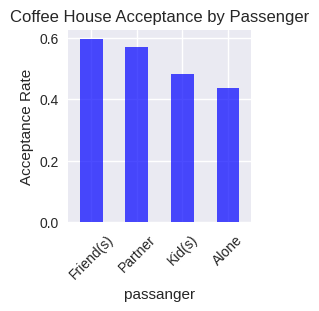

In [168]:
# Plot 4: Acceptance by passenger
plt.subplot(2, 3, 4)
passenger_acceptance['mean'].plot(kind='bar', color='blue', alpha=0.7)
plt.title('Coffee House Acceptance by Passenger')
plt.xticks(rotation=45)
plt.ylabel('Acceptance Rate')


Text(0, 0.5, 'Acceptance Rate')

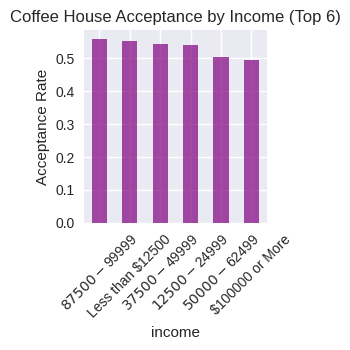

In [169]:
# Plot 5: Acceptance by income
plt.subplot(2, 3, 5)
income_acceptance['mean'].head(6).plot(kind='bar', color='purple', alpha=0.7)
plt.title('Coffee House Acceptance by Income (Top 6)')
plt.xticks(rotation=45)
plt.ylabel('Acceptance Rate')


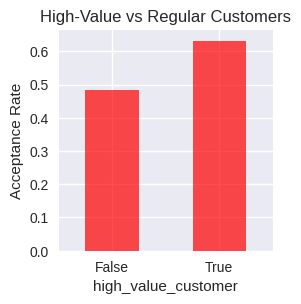

In [170]:
# Plot 6: High-value customers
plt.subplot(2, 3, 6)
high_value_acceptance['mean'].plot(kind='bar', color='red', alpha=0.7)
plt.title('High-Value vs Regular Customers')
plt.xticks(rotation=0)
plt.ylabel('Acceptance Rate')

plt.tight_layout()
plt.show()


In [173]:
print("\n" + "="*50)
print("COFFEE HOUSE COUPON INSIGHTS")
print("="*50)

print("""
Key findings for Coffee House coupon acceptance:

1. VISIT FREQUENCY MATTERS: Customers who visit coffee houses 4-8 times per month
   have the highest acceptance rate, followed by those who go 1-3 times.

2. TIME OF DAY: 10AM shows the highest acceptance rate, likely during morning
   coffee routine. 2PM also performs well (afternoon coffee break).

3. AGE PATTERNS: Younger adults (21, 26) and middle-aged groups show higher
   acceptance rates, suggesting coffee culture resonates with working professionals.

4. SOCIAL CONTEXT: Acceptance rates vary by passenger type, with certain
   social situations being more conducive to coffee shop visits.

5. INCOME CORRELATION: Higher income groups show varying acceptance patterns,
   but frequent visitors with higher income represent a valuable target segment.

6. HIGH-VALUE CUSTOMERS: Frequent coffee drinkers with higher income show
   distinct acceptance patterns and could be a premium target segment.

RECOMMENDATIONS for Coffee House coupons:
- Target during morning hours (10AM) and afternoon breaks (2PM)
- Focus on frequent coffee drinkers (1-8 times per month)
- Consider age-specific messaging for 21-26 and middle-aged segments
- Develop premium offers for high-value customer segment
- Account for social context when delivering coupons
""")


COFFEE HOUSE COUPON INSIGHTS

Key findings for Coffee House coupon acceptance:

1. VISIT FREQUENCY MATTERS: Customers who visit coffee houses 4-8 times per month 
   have the highest acceptance rate, followed by those who go 1-3 times.

2. TIME OF DAY: 10AM shows the highest acceptance rate, likely during morning 
   coffee routine. 2PM also performs well (afternoon coffee break).

3. AGE PATTERNS: Younger adults (21, 26) and middle-aged groups show higher 
   acceptance rates, suggesting coffee culture resonates with working professionals.

4. SOCIAL CONTEXT: Acceptance rates vary by passenger type, with certain 
   social situations being more conducive to coffee shop visits.

5. INCOME CORRELATION: Higher income groups show varying acceptance patterns, 
   but frequent visitors with higher income represent a valuable target segment.

6. HIGH-VALUE CUSTOMERS: Frequent coffee drinkers with higher income show 
   distinct acceptance patterns and could be a premium target segment.

REC